### Charge-to-Mass Ratio Lab - Data & Results

This notebook includes all data processing, graphs, and final calculations for the Charge-to-Mass Lab. 

In [28]:
import matplotlib.pyplot as plt
import math
from uncertainties import ufloat, umath, unumpy
import numpy as np
import pandas as pd

lambda_0 = (ufloat(282.8, 0.4))/(10**9)

In [29]:
def compute_line_fit(xs, ys): #Function to compute line fit
    xs, xerror = np.array([x.n for x in xs]), np.array([x.s for x in xs])
    ys, yerror = np.array([x.n for x in ys]), np.array([x.s for x in ys])
    
    N = len(xs)
    b = (np.sum(xs**2) * np.sum(ys) - np.sum(xs) * np.sum(xs * ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    m = (N * np.sum(xs * ys) - np.sum(xs) * np.sum(ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    delta = np.sum(1/(yerror**2)) * np.sum(xs**2 / yerror**2) - (np.sum(xs / yerror**2))**2
    db = np.sqrt(1 / delta * np.sum(xs**2 / yerror**2))
    dm = np.sqrt(1 / delta * np.sum(1 / yerror**2))
    return ufloat(m, dm), ufloat(b, db)

def reduced_chi_squared(xs, ys, m, b): #Function to compute reduced chi squared value
    
    m = m.n
    b = b.n
    
    xs, xerror = np.array([x.n for x in xs]), np.array([x.s for x in xs])
    ys, yerror = np.array([x.n for x in ys]), np.array([x.s for x in ys])
    
    print(xs, "\n", xerror, "\n", xs + xerror)
    
    chi_sq = sum((ys - m * xs - b) ** 2 / yerror ** 2)
    
    chi_sq_max = sum((ys - m * (xs + xerror) - b) ** 2 / yerror ** 2)
    chi_sq_min = sum((ys - m * (xs - xerror) - b) ** 2 / yerror ** 2)
    
    chi_sq_err = max(abs(chi_sq - chi_sq_max), abs(chi_sq - chi_sq_min))
    
    reduced_chi_sq =  chi_sq/(len(ys) - 2)
    reduced_chi_sq_err = chi_sq_err/(len(ys) - 2)
    
    print(reduced_chi_sq, reduced_chi_sq_err)
    
    return ufloat(reduced_chi_sq, reduced_chi_sq_err)

def graph_data_with_linear_fit(xs, ys, title, x_label, y_label, measurements_label, linear_fit_label):
    xs_abs, xs_error = np.array([x.n for x in xs]), np.array([x.s for x in xs])
    ys_abs, ys_error = np.array([x.n for x in ys]), np.array([x.s for x in ys])

    #computes line fit and reduced chi squared values
    line_fit_slope, line_fit_y_intercept = compute_line_fit(xs, ys)
    
    reduced_chi_squared_val = reduced_chi_squared(xs, ys, line_fit_slope, 
    line_fit_y_intercept)
        
    #plots x and y data points, and the linear fit
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})
    ax1.errorbar(xs_abs, ys_abs, xerr= xs_error, yerr= ys_error, fmt=".", label=measurements_label, color="blue")
    ax1.plot(xs_abs, line_fit_slope.n * xs_abs + line_fit_y_intercept.n, label= linear_fit_label[0] + str(line_fit_slope) + linear_fit_label[1] + 
    " (" + str(line_fit_y_intercept) + ") ", color="black")
    
    ax1.legend(loc='best', prop={'size': 7})
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.set_title(title)

    #residual plot
    ax2.errorbar(xs_abs, ys_abs - (line_fit_slope.n * xs_abs + line_fit_y_intercept.n),
                yerr=ys_error, xerr=xs_error, fmt=".",
                color="blue")
    ax2.axhline(y=0, color="black")
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.set_title("Residuals")

    fig.tight_layout()
    plt.show()
    
    return line_fit_slope, line_fit_y_intercept, reduced_chi_squared_val

def add(a,b):
    return ufloat(a.n + b.n, a.s + b.s)

def add_arr(arr,b):
    return unumpy.uarray([(arr[i].n + b.n) for i in range(0, len(arr))], [(arr[i].s + b.s) for i in range(0, len(arr))])

def sub(a,b):
    return ufloat(a.n - b.n, a.s + b.s)

def sub_arr(arr,b):
    return unumpy.uarray([(arr[i].n - b.n) for i in range(0, len(arr))], [(arr[i].s + b.s) for i in range(0, len(arr))])
    

#### Part 1 - Calibration

The following calculates the parameters m and b in the Hartmann Relation Method, shown below:

$ y = \frac{m}{\lambda - \lambda _{0}} + b$

$y$ represents the Vernier scale reading, $\lambda$ the wavelength of the spectral line, $\lambda _{0}$ the spectrometer's optical offset, and $m$ and $b$ are constants to be determined during calibration.

In [30]:
#Part 1 - Calibration

helium_wavelengths = unumpy.uarray([447.1, 471.3, 492.2, 501.6, 587.6, 667.8], [0.05]*6)
hydrogen_wavelengths = unumpy.uarray([410.2, 434.0, 486.1, 656.3], [0.05]*4)

helium_scale_readings = unumpy.uarray([14.20, 12.59, 11.47, 11.08, 8.53, 7.06], [0.02]*6)
hydrogen_scale_readings = unumpy.uarray([17.69, 15.32, 11.83, 7.24], [0.02]*4)

output_helium_wavelengths = np.expand_dims(helium_wavelengths, 0) #this code outputs the observations to a table
output_hydrogen_wavelengths = np.expand_dims(hydrogen_wavelengths, 0)

output_helium_scale_readings = np.expand_dims(helium_scale_readings, 0) #this code outputs the observations to a table
output_hydrogen_scale_readings = np.expand_dims(hydrogen_scale_readings, 0)
output_helium = np.array([output_helium_wavelengths, output_helium_scale_readings]).squeeze(1).transpose()
output_hydrogen = np.array([output_hydrogen_wavelengths, output_hydrogen_scale_readings]).squeeze(1).transpose()

print(pd.DataFrame(output_helium, columns=["Helium Spectrum Wavelengths [nm]", "Vernier Scale Reading [mm]"]))
print(pd.DataFrame(output_hydrogen, columns=["Hydrogen Spectrum Wavelengths [nm]", "Vernier Scale Reading [mm]"]))

  Helium Spectrum Wavelengths [nm] Vernier Scale Reading [mm]
0                    447.10+/-0.05             14.200+/-0.020
1                    471.30+/-0.05             12.590+/-0.020
2                    492.20+/-0.05             11.470+/-0.020
3                    501.60+/-0.05             11.080+/-0.020
4                    587.60+/-0.05              8.530+/-0.020
5                    667.80+/-0.05              7.060+/-0.020
  Hydrogen Spectrum Wavelengths [nm] Vernier Scale Reading [mm]
0                      410.20+/-0.05             17.690+/-0.020
1                      434.00+/-0.05             15.320+/-0.020
2                      486.10+/-0.05             11.830+/-0.020
3                      656.30+/-0.05              7.240+/-0.020


[6086427.26719416 5305039.78779841 4775549.18815664 4570383.91224863
 3280839.89501312 2597402.5974026 ] 
 [16670.06859548 12664.55121756 10262.64152183  9399.7840974
  4843.75968752  3035.92511385] 
 [6103097.33578964 5317704.33901597 4785811.82967846 4579783.69634603
 3285683.65470064 2600438.52251644]


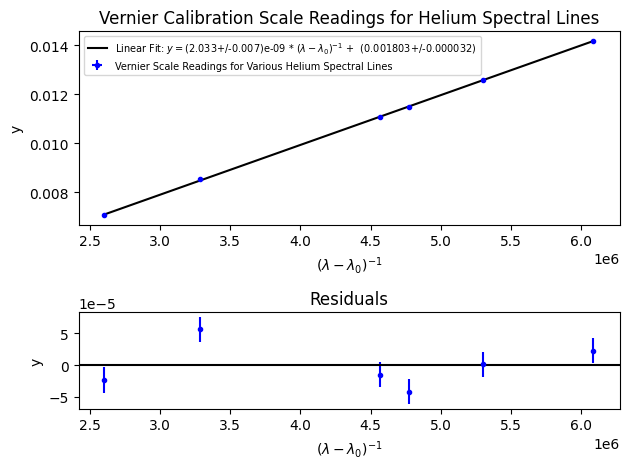

3.9+/-1.8
[7849293.56357928 6613756.61375661 4918839.15395967 2677376.17135208] 
 [27725.13425126 19683.7994457  10887.74038014  3225.75442332] 
 [7877018.69783054 6633440.41320232 4929726.8943398  2680601.92577539]


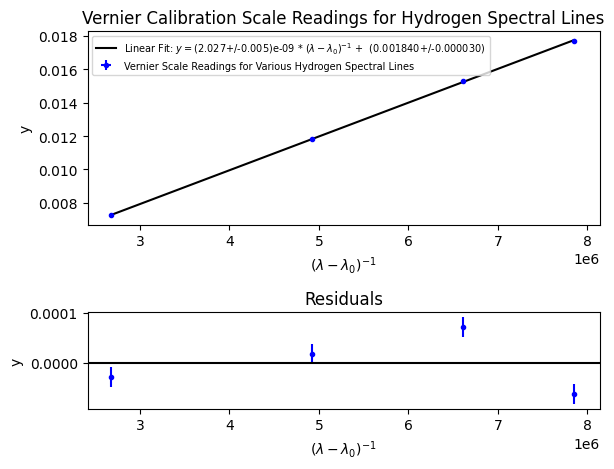

13+/-8


In [31]:
helium_wavelengths = sub_arr(helium_wavelengths/(10**9), lambda_0)**(-1)
hydrogen_wavelengths = sub_arr(hydrogen_wavelengths/(10**9), lambda_0)**(-1)

helium_scale_readings = helium_scale_readings/(10**3)
hydrogen_scale_readings = hydrogen_scale_readings/(10**3)

helium_calibration_slope, helium_calibration_y_intercept, helium_linear_fit_chi_squared = graph_data_with_linear_fit(helium_wavelengths, helium_scale_readings,
"Vernier Calibration Scale Readings for Helium Spectral Lines", "$(λ - λ_{0})^{-1}$", "y",
"Vernier Scale Readings for Various Helium Spectral Lines", ["Linear Fit: $y = $", " * $(λ - λ_{0})^{-1}$ + "] )

print(helium_linear_fit_chi_squared)

hydrogen_calibration_slope, hydrogen_calibration_y_intercept, hydrogen_linear_fit_chi_squared = graph_data_with_linear_fit(hydrogen_wavelengths, hydrogen_scale_readings,
"Vernier Calibration Scale Readings for Hydrogen Spectral Lines", "$(λ - λ_{0})^{-1}$", "y",
"Vernier Scale Readings for Various Hydrogen Spectral Lines", ["Linear Fit: $y = $", " * $(λ - λ_{0})^{-1}$ + "] )

print(hydrogen_linear_fit_chi_squared)

#### Part 2 - Determining Unknown Gas

The unknown gas's spectrum can be determined by substituting the values for $m$ and $b$ determined in Part 1 into a modified form of the Hartmann Relation, shown below.  

$ \lambda = \frac{m}{y - b} + \lambda _{0}$

By measuring the vernier scale readings for the spectral lines of the unknown gas, the corresponding wavelength for each reading can be determined from the above relation. 

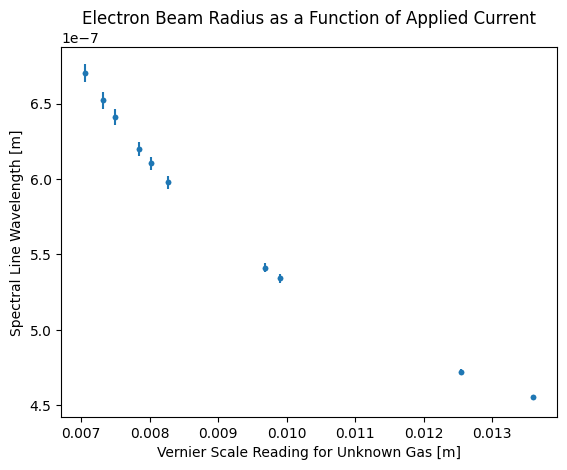

  Vernier Scale Reading [mm] Unknown Gas Spectral Line Wavelengths [nm]
0              7.060+/-0.020                                    670+/-6
1              7.320+/-0.020                                    652+/-5
2              7.490+/-0.020                                    641+/-5
3              7.850+/-0.020                                    620+/-5
4              8.020+/-0.020                                    610+/-4
5              8.270+/-0.020                                    598+/-4
6              9.680+/-0.020                                541.2+/-3.0
7              9.900+/-0.020                                534.2+/-2.8
8             12.550+/-0.020                                472.1+/-1.9
9             13.600+/-0.020                                455.2+/-1.7


In [32]:
calibration_slope = ufloat(2.031, 0.009)/(10**9)
calibration_y_intercept = ufloat(1.82, 0.05)/(10**3)

unknown_gas_scale_readings = unumpy.uarray([7.06, 7.32, 7.49, 7.85, 8.02, 8.27, 9.68, 9.90, 12.55, 13.60],
[0.02]*10)
unknown_gas_scale_readings = unknown_gas_scale_readings/(10**3)

unknown_gas_spectral_line_wavelengths = add_arr(calibration_slope/sub_arr(unknown_gas_scale_readings, calibration_y_intercept), lambda_0)

plt.scatter([x.n for x in unknown_gas_scale_readings], [x.n for x in unknown_gas_spectral_line_wavelengths], marker='.')
plt.errorbar([x.n for x in unknown_gas_scale_readings], [x.n for x in unknown_gas_spectral_line_wavelengths], 
yerr=[x.s for x in unknown_gas_spectral_line_wavelengths], xerr=[x.s for x in unknown_gas_scale_readings], fmt='.')

plt.xlabel("Vernier Scale Reading for Unknown Gas [m]")
plt.ylabel("Spectral Line Wavelength [m]")
plt.title("Electron Beam Radius as a Function of Applied Current")

plt.show()

output_unknown_gas_scale_readings = np.expand_dims(unknown_gas_scale_readings*(10**3), 0) #this code outputs the observations to a table
output_unknown_gas_spectral_line_wavelengths = np.expand_dims(unknown_gas_spectral_line_wavelengths*(10**9), 0)
output_unknown_gas = np.array([output_unknown_gas_scale_readings, output_unknown_gas_spectral_line_wavelengths]).squeeze(1).transpose()
print(pd.DataFrame(output_unknown_gas, columns=["Vernier Scale Reading [mm]", "Unknown Gas Spectral Line Wavelengths [nm]"]))


#### Part 3 - Determining the Rydberg Constant $R_{H}$

The Rydberg constant can be determined from the spectral lines of hydrogen and Johann's Balmer's formula, shown below:

$ \frac{1}{\lambda} = R_{H}(\frac{1}{2^{2}} - \frac{1}{n^{2}})$

Rearranging this relation gives the following:

$ \frac{1}{R_{H}} = \lambda (\frac{1}{2^{2}} - \frac{1}{n^{2}})$

Therefore, the expression $\lambda (\frac{1}{2^{2}} - \frac{1}{n^{2}})$ must have a constant value. Knowing this, one can determine the ratio of the values of the $(\frac{1}{2^{2}} - \frac{1}{n^{2}})$ terms for each of the spectral lines, the wavelengths of which are known. 

The wavelengths of four hydrogen spectral lines are known: $(410.2 \pm 0.05)$ nm, $(434.0 \pm 0.05)$ nm, $(486.1 \pm 0.05)$ nm,
$(656.3 \pm 0.05)$ nm. Balmer's formula can be rearranged and expressed for each of these four spectral lines, as follows:

$ \frac{1}{R_{H}} = \lambda _{410} (\frac{1}{2^{2}} - \frac{1}{(n_{410})^{2}})$

$ \frac{1}{R_{H}} = \lambda _{434} (\frac{1}{2^{2}} - \frac{1}{(n_{434})^{2}})$

$ \frac{1}{R_{H}} = \lambda _{486} (\frac{1}{2^{2}} - \frac{1}{(n_{486})^{2}})$

$ \frac{1}{R_{H}} = \lambda _{656} (\frac{1}{2^{2}} - \frac{1}{(n_{656})^{2}})$

Substituting the real values of the wavelengths,

$ \frac{1}{R_{H}} =  (410.2 \pm 0.05)*10^{-9} (\frac{1}{2^{2}} - \frac{1}{(n_{410})^{2}})$

$ \frac{1}{R_{H}} = (434.0 \pm 0.05)*10^{-9} (\frac{1}{2^{2}} - \frac{1}{(n_{434})^{2}})$

$ \frac{1}{R_{H}} = (486.1 \pm 0.05)*10^{-9} (\frac{1}{2^{2}} - \frac{1}{(n_{486})^{2}})$

$ \frac{1}{R_{H}} = (656.3 \pm 0.05)*10^{-9} (\frac{1}{2^{2}} - \frac{1}{(n_{656})^{2}})$

The longest wavelength (lowest energy) spectral line should represent the lowest value of n. Hypothesizing that $n_{656}$ = 3, 

$ \frac{1}{R_{H}} = (656.3 \pm 0.05)*10^{-9} (\frac{1}{2^{2}} - \frac{1}{(3)^{2}})$




In [33]:
rydberg_const_reciprocal = (ufloat(656.3, 0.05)/(10**9)) * (1/(2**2) - 1/(3**2))
rydberg_const_656 = (rydberg_const_reciprocal)**(-1)
print(rydberg_const_656)

rydberg_const_reciprocal = (ufloat(486.1, 0.05)/(10**9)) * (1/(2**2) - 1/(4**2))
rydberg_const_486 = (rydberg_const_reciprocal)**(-1)
print(rydberg_const_486)

rydberg_const_reciprocal = (ufloat(434.0, 0.05)/(10**9)) * (1/(2**2) - 1/(5**2))
rydberg_const_434 = (rydberg_const_reciprocal)**(-1)
print(rydberg_const_434)

rydberg_const_reciprocal = (ufloat(410.2, 0.05)/(10**9)) * (1/(2**2) - 1/(6**2))
rydberg_const_410 = (rydberg_const_reciprocal)**(-1)
print(rydberg_const_410)

rydberg_const = add(add(add(rydberg_const_656, rydberg_const_486), rydberg_const_434), rydberg_const_410)/4

print(rydberg_const)

(1.09706+/-0.00008)e+07
(1.09717+/-0.00011)e+07
(1.09721+/-0.00013)e+07
(1.09703+/-0.00013)e+07
(1.09712+/-0.00011)e+07


This suggest a value of $R_{H} = (1.09706+/-0.00033) * 10^{7}  m^{-1}$. To confirm this value, $n_{410}$, $n_{434}$, $n_{486}$. Must be calculated. If they can reasonably be assumed to be integer values based on calculations, then this value of $R_{H}$ is valid.

In [34]:
n_410 = (0.25 - (ufloat(410.2, 0.05)*(10**(-9))*rydberg_const)**(-1))**(-0.5)
n_434 = (0.25 - (ufloat(434.0, 0.05)*(10**(-9))*rydberg_const)**(-1))**(-0.5)
n_486 = (0.25 - (ufloat(486.1, 0.05)*(10**(-9))*rydberg_const)**(-1))**(-0.5)

print(n_410)
print(n_434)
print(n_486)

5.998+/-0.004
5.0012+/-0.0020
4.0003+/-0.0009


The values of $n_{410}$, $n_{434}$, $n_{486}$ are evidently $6$, $5$, and $4$ respectively, as each of the calculated values is very close to those integer values (within the uncertainty range). Therefore, we conclude that $R_{H} = (1.09706+/-0.00033) * 10^{7}  m^{-1}$. Given this, we can calculate $R_{EH}$ in terms of electronvolts, by using equations (1) and (4), shown below:



In [35]:
h = 6.626 * (10**(-34))
c = 2.99 * (10**8)

ev_to_joules = 1.602 * (10**(-19))

lambda_656 = ufloat(656.3, 0.05)*(10**(-9))
lambda_486 = ufloat(486.1, 0.05)*(10**(-9))
lambda_434 = ufloat(434.0, 0.05)*(10**(-9))
lambda_410 = ufloat(410.2, 0.05)*(10**(-9))


m, n_656, n_486, n_434, n_410 = 2, 3, 4, 5, 6

rydberg_ev_656 = (h*c/lambda_656)/(1/(m**2) - 1/(n_656**2))/ev_to_joules
rydberg_ev_486 = (h*c/lambda_486)/(1/(m**2) - 1/(n_486**2))/ev_to_joules
rydberg_ev_434 = (h*c/lambda_434)/(1/(m**2) - 1/(n_434**2))/ev_to_joules
rydberg_ev_410 = (h*c/lambda_410)/(1/(m**2) - 1/(n_410**2))/ev_to_joules

rydberg_ev = add(add(add(rydberg_ev_656, rydberg_ev_486), rydberg_ev_434), rydberg_ev_410)/4
print(rydberg_ev)

13.5679+/-0.0014


The calculated $R_{EH}$ is $13.5679 \pm 0.0014$ eV, which is fairly close to the known value of $13.605693$ eV, indicating that the experiment results are accurate.

#### Part 4 - Sodium Spectral Line Separation

To determine the accuracy of the experimental setup, and thereby validate the above calculation for the Rydberg constant, the spectrum of sodium was observed, particularly the separation of two spectral lines at wavelengths corresponding the the yellow range of the visible light spectrum. The tabulated wavelengths for these lines are $588.9950$ nm and $589.5924$ nm - close enough together that whether a spectrometer can observe their separation is a good test of its accuracy. In this experiment, the two spectral lines were seen to have Vernier Scale Readings of $8.39$ mm and $8.47$ mm. 

In [36]:
calibration_slope = ufloat(2.031, 0.009)/(10**9)
calibration_y_intercept = ufloat(1.82, 0.05)/(10**3)

sodium_readings = unumpy.uarray([8.39, 8.47], [0.005]*2)
sodium_readings = sodium_readings/(10**3)

sodium_spectral_line_wavelengths = add_arr(calibration_slope * (sub_arr(sodium_readings,calibration_y_intercept) ** (-1)), lambda_0)

print(sodium_spectral_line_wavelengths*(10**9))

[591.9324200913242+/-3.328067256006306
 588.2135338345865+/-3.2656944267978942]
